### Project was peer-reviewed and validated by a Data Scientist.
### Training and testing dataset can be downloaded through Kaggle at https://www.kaggle.com/c/titanic

- Business objective of this project is to predict the survivors in Titanic.
- Hypothesis: Women and children would have the high likelihood of surviving compared to men.
- Ranked top 11% on Kaggle as of June 2018, but the project was done and finished in April.

![Titanic](tempsnip.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Import Titanic training and testing datasets because these are the datasets that have information that will be used to analyze and predict who survived.

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

# 2. Merge training and testing dataset because there are missing values both in training and testing dataset and it would be beneficial to look at both datasets together as a whole for analysis purpose and to fill the missing values. 

In [3]:
ship = data_train.append(data_test, ignore_index = True)

C:\Users\maniq\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [4]:
ship.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


# 3. A new column "Title" is created from Names – Name is split at space, but a better and efficient way would be to split the name at comma instead because a title doesn't always appear after the first space, but it mostly does after the first comma.

In [5]:
ship['Title'] = ship['Name'].apply(lambda x: x.split(" ")[1])

In [6]:
ship.head(6)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr.
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs.
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss.
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs.
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr.
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Mr.


# 4.  By adding SibSp(sibling and spouse) and Parch(parent and child) a new column called Family is created.  
  

# 1 should be added to account for the person the row belongs to because if there are no values or people in Parch and SibSp, then in the Family column there will be 0. And adding 1 accounts for everyone. 

In [7]:
ship['Family'] = (ship.Parch)+(ship.SibSp)

In [8]:
#Just to be sure SibSp+ Parch adds upto Family
print(ship.Parch.agg(('mean','sum'))+ship.SibSp.agg(('mean','sum')))
print(ship.Family.agg(('mean','sum')))

#print(ship.Family).agg(('mean','median','min','max','count', 'sum'))

mean       0.883881
sum     1157.000000
dtype: float64
mean       0.883881
sum     1157.000000
Name: Family, dtype: float64


# 5. Drop columns 

- Drop PassengerId because it just increases with an increment of 1. 

- Drop Parch and SibSp because from these two columns a new column, Family, was created. 

In [9]:
ship.drop('PassengerId', axis = 1, inplace = True)
ship.drop('Parch', axis = 1, inplace = True)
ship.drop('SibSp', axis = 1, inplace = True)

In [10]:
ship.head()

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",3,male,0.0,A/5 21171,Mr.,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,1.0,PC 17599,Mrs.,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",3,female,1.0,STON/O2. 3101282,Miss.,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,1.0,113803,Mrs.,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",3,male,0.0,373450,Mr.,0


In [11]:
#Different types of column
ship.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Don.', 'Rev.',
       'Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Major.', 'Gordon,',
       'Messemaeker,', 'Mlle.', 'Col.', 'Capt.', 'Velde,', 'the',
       'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,', 'Khalil,',
       'Palmquist,', 'Brito,'], dtype=object)

# 6. Fill missing values

In [12]:
missing = ship.isnull().sum()
missing[missing>0]

Age          263
Cabin       1014
Embarked       2
Fare           1
Survived     418
dtype: int64

(array([  2.,   0.,   0., 270.,   0.,   0., 123.,   0.,   0., 914.]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <a list of 10 Patch objects>)

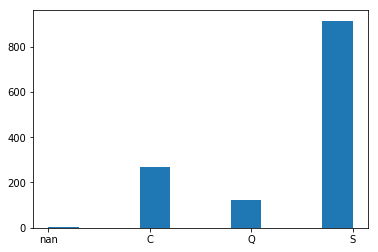

In [13]:
#Let's fill mising values for Embarked.
plt.hist(ship.Embarked)

# Since 'S' is the most repeated value for Embarked, that is most people were from Southampton, so two missing values for Embarked will be filled with S.

In [14]:
ship.Embarked.fillna('S', inplace = True)

In [15]:
#Let's fill missing values for Fare
ship.Fare.agg(('mean','min','max'))

mean     33.295479
min       0.000000
max     512.329200
Name: Fare, dtype: float64

# Fill missing values for Fare with mean.

In [16]:
ship.Fare.fillna(33.29, inplace = True)

# Fill missing values for Cabin and temporarily drop missing values for Cabin to see if there are any patterns. 

  

# When the project was being done the data was plotted by the below method which would prevent the histogram from being plotted unless the missing values were dropped. However, the following code can be used ship.Cabin.hist(bins=50) to plot the histogram without having to drop missing values and this method is much better because often times there are datasets that have missing values and it is efficient to be able to draw plots without having to drop missing values each time. 

(array([ 4.,  4.,  4.,  5.,  4.,  4.,  4.,  6.,  6.,  3.,  5.,  7., 12.,
         5.,  6.,  4.,  8.,  5.,  6.,  6.,  4., 13.,  6.,  4.,  5.,  7.,
         6.,  9.,  7.,  4.,  6.,  8.,  7.,  5.,  8.,  7.,  3.,  4.,  4.,
         3.,  7.,  8.,  6.,  4.,  6.,  5.,  4.,  4., 12., 11.]),
 array([  0. ,   3.7,   7.4,  11.1,  14.8,  18.5,  22.2,  25.9,  29.6,
         33.3,  37. ,  40.7,  44.4,  48.1,  51.8,  55.5,  59.2,  62.9,
         66.6,  70.3,  74. ,  77.7,  81.4,  85.1,  88.8,  92.5,  96.2,
         99.9, 103.6, 107.3, 111. , 114.7, 118.4, 122.1, 125.8, 129.5,
        133.2, 136.9, 140.6, 144.3, 148. , 151.7, 155.4, 159.1, 162.8,
        166.5, 170.2, 173.9, 177.6, 181.3, 185. ]),
 <a list of 50 Patch objects>)

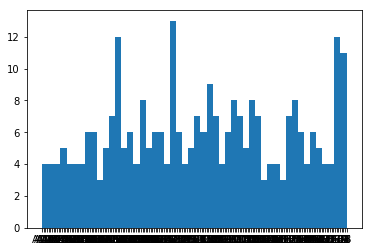

In [17]:
temp_cabin = ship.dropna(subset=['Cabin'])
plt.hist(temp_cabin.Cabin, bins = 50)

# Cabin is missing 1,014 values, and it's hard to tell from the above plot where to place those missing values for Cabin. Because looking at the above plot one Cabin doesn’t standout over other cabins. So these missing values will be filled with a new letter called Unknown.

In [18]:

ship.Cabin.fillna('Unknown', inplace = True)

(array([  21.,   24.,   34.,   30.,   31.,   34.,   34.,   23.,   29.,
        1049.]),
 array([  0. ,  18.6,  37.2,  55.8,  74.4,  93. , 111.6, 130.2, 148.8,
        167.4, 186. ]),
 <a list of 10 Patch objects>)

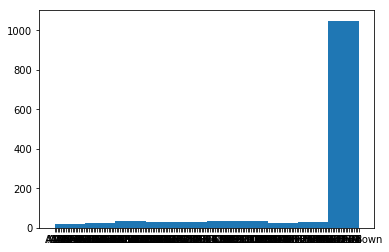

In [19]:
plt.hist(ship.Cabin)

In [20]:
#What other values are we missing?
missing = ship.isnull().sum()
missing[missing>0]

Age         263
Survived    418
dtype: int64

# Fill the missing values for age by looking at different Titles

In [21]:
#Let's fill the missing values for people who's title is Master because 
# But frst let's see how many Masters are missing age
print(ship.Age[ship.Title == 'Master.'].isnull().sum())
print(ship.Age[ship.Title == 'Master.'].count())

7
52


In [22]:
#Let's see what the mean, median, min, and max are for Master.
ship.Age[ship.Title == 'Master.'].agg(('min','max','mean','median'))

min        0.330000
max       14.500000
mean       5.366923
median     4.000000
Name: Age, dtype: float64

# Fill the missing values of people who have the Title of Master with Median of age of 4.

In [23]:
ship.loc[ship.Title == 'Master.', 'Age'] = 4

In [24]:
print(ship.Age[ship.Title == 'Master.'].isnull().sum())
print(ship.Age[ship.Title == 'Master.'].count())

0
59


In [25]:
#Let's fill the age for Miss.
print(ship.Age[ship.Title == 'Miss.'].isnull().sum())
print(ship.Age[ship.Title == 'Miss.'].count())
print(ship.Age[ship.Title == 'Miss.'].agg(('mean','median','min','max')))

50
206
mean      21.784417
median    22.000000
min        0.170000
max       63.000000
Name: Age, dtype: float64


# Fill missing values of Miss. with Median age of 22.


In [26]:
ship.loc[ship.Title == 'Miss.', 'Age'] = 22

In [27]:
print(ship.Age[ship.Title == 'Miss.'].isnull().sum())
print(ship.Age[ship.Title == 'Miss.'].count())

0
256


In [28]:
#How many more values are missing?
missing = ship.isnull().sum()
missing[missing>0]

Age         206
Survived    418
dtype: int64

In [29]:
#Let's fill the missing values for age for Mr.
print(ship.Age[ship.Title == 'Mr.'].isnull().sum())
print(ship.Age[ship.Title == 'Mr.'].agg(('min','max','mean','median'))) 

174
min       11.000000
max       80.000000
mean      32.282918
median    29.000000
Name: Age, dtype: float64


In [30]:
ship[(ship.Title == 'Mr.')& (ship.Age < 15)]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
683,14.0,Unknown,S,46.9000,"Goodwin, Mr. Charles Edward",3,male,0.0,CA 2144,Mr.,7
686,14.0,Unknown,S,39.6875,"Panula, Mr. Jaako Arnold",3,male,0.0,3101295,Mr.,5
731,11.0,Unknown,C,18.7875,"Hassan, Mr. Houssein G N",3,male,0.0,2699,Mr.,0
896,14.0,Unknown,S,9.2250,"Svensson, Mr. Johan Cervin",3,male,NaN,7538,Mr.,0
1121,14.0,Unknown,S,65.0000,"Sweet, Mr. George Frederick",2,male,NaN,220845,Mr.,0


# Fill missing values of people who have Title of Mr. with median age of 29.

In [31]:
ship.loc[ship.Title == 'Mr.', 'Age'] = 29

In [32]:
missing = ship.isnull().sum()
missing[missing>0]

Age          32
Survived    418
dtype: int64

In [33]:
# We now just have 32 missing values to fill in Age.
ship.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Don.', 'Rev.',
       'Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Major.', 'Gordon,',
       'Messemaeker,', 'Mlle.', 'Col.', 'Capt.', 'Velde,', 'the',
       'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,', 'Khalil,',
       'Palmquist,', 'Brito,'], dtype=object)

In [34]:
#Let's look at Mrs. If it's missing any values in Age.
print(ship.Age[ship.Title == 'Mrs.'].isnull().sum())
print(ship.Age[ship.Title == 'Mrs.'].agg(('min','max','mean','median')))

27
min       14.000000
max       76.000000
mean      37.231707
median    36.000000
Name: Age, dtype: float64


# Fill 27 missing values of Age for Mrs. with median of 36.

In [35]:
ship.loc[ship.Title == 'Mrs.', 'Age'] = 36

In [36]:
ship.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Don.', 'Rev.',
       'Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Major.', 'Gordon,',
       'Messemaeker,', 'Mlle.', 'Col.', 'Capt.', 'Velde,', 'the',
       'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,', 'Khalil,',
       'Palmquist,', 'Brito,'], dtype=object)

# Having created the first model and hypothesizing that women and children were prioritized over men, the current model can be made better by creating three categories of Master, Mr., and Miss. Or two categories of Mr. and Other (Women and Children), so when the model is trained, it would give equal weight to women and children(boys and girls). 

# But for this project all different Titles are consolidated into Master, Mr., Miss, and Mrs. It would help to group together different titles of the same gender. 

In [37]:
ship.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Don.', 'Rev.',
       'Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Major.', 'Gordon,',
       'Messemaeker,', 'Mlle.', 'Col.', 'Capt.', 'Velde,', 'the',
       'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,', 'Khalil,',
       'Palmquist,', 'Brito,'], dtype=object)

In [38]:
ship[ship.Title == 'Don.']

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
30,40.0,Unknown,C,27.7208,"Uruchurtu, Don. Manuel E",1,male,0.0,PC 17601,Don.,0


In [39]:
ship.replace("Don.", "Mr.", inplace = True)

In [40]:
ship[ship.Ticket == 'PC 17601']

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
30,40.0,Unknown,C,27.7208,"Uruchurtu, Don. Manuel E",1,male,0.0,PC 17601,Mr.,0


In [41]:
ship[ship.Title == 'Rev.']

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
149,42.0,Unknown,S,13.000,"Byles, Rev. Thomas Roussel Davids",2,male,0.0,244310,Rev.,0
150,51.0,Unknown,S,12.525,"Bateman, Rev. Robert James",2,male,0.0,S.O.P. 1166,Rev.,0
249,54.0,Unknown,S,26.000,"Carter, Rev. Ernest Courtenay",2,male,0.0,244252,Rev.,1
626,57.0,Unknown,Q,12.350,"Kirkland, Rev. Charles Leonard",2,male,0.0,219533,Rev.,0
848,28.0,Unknown,S,33.000,"Harper, Rev. John",2,male,0.0,248727,Rev.,1
886,27.0,Unknown,S,13.000,"Montvila, Rev. Juozas",2,male,0.0,211536,Rev.,0
1040,30.0,Unknown,S,26.000,"Lahtinen, Rev. William",2,male,NaN,250651,Rev.,2
1055,41.0,Unknown,S,13.000,"Peruschitz, Rev. Joseph Maria",2,male,NaN,237393,Rev.,0


In [42]:
ship.replace("Rev.", "Mr.", inplace = True)

In [43]:
ship[ship.Title == "der"]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
170,61.0,B19,S,33.5,"Van der hoef, Mr. Wyckoff",1,male,0.0,111240,der,0


In [44]:
ship.replace("der", "Mr.", inplace = True)

In [45]:
ship[ship.Title == 'Walle,']

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
200,28.0,Unknown,S,9.5,"Vande Walle, Mr. Nestor Cyriel",3,male,0.0,345770,"Walle,",0


In [46]:
ship.replace("Walle,", "Mr.", inplace = True)

In [47]:
ship[ship.Title == "Dr."]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
245,44.0,C78,Q,90.0000,"Minahan, Dr. William Edward",1,male,0.0,19928,Dr.,2
317,54.0,Unknown,S,14.0000,"Moraweck, Dr. Ernest",2,male,0.0,29011,Dr.,0
398,23.0,Unknown,S,10.5000,"Pain, Dr. Alfred",2,male,0.0,244278,Dr.,0
632,32.0,B50,C,30.5000,"Stahelin-Maeglin, Dr. Max",1,male,1.0,13214,Dr.,0
660,50.0,Unknown,S,133.6500,"Frauenthal, Dr. Henry William",1,male,1.0,PC 17611,Dr.,2
766,NaN,Unknown,C,39.6000,"Brewe, Dr. Arthur Jackson",1,male,0.0,112379,Dr.,0
796,49.0,D17,S,25.9292,"Leader, Dr. Alice (Farnham)",1,female,1.0,17465,Dr.,0
1184,53.0,A34,S,81.8583,"Dodge, Dr. Washington",1,male,NaN,33638,Dr.,2


In [48]:
ship[ship.Title ==  "Pelsmaeker,"]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
282,16.0,Unknown,S,9.5,"de Pelsmaeker, Mr. Alfons",3,male,0.0,345778,"Pelsmaeker,",0


In [49]:
ship.replace("Pelsmaeker,", "Mr.", inplace = True)

In [50]:
ship.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Billiard,', 'Dr.',
       'Mulder,', 'y', 'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.',
       'Major.', 'Gordon,', 'Messemaeker,', 'Mlle.', 'Col.', 'Capt.',
       'Velde,', 'the', 'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,',
       'Khalil,', 'Palmquist,', 'Brito,'], dtype=object)

In [51]:
ship[ship.Title == "Mulder,"]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
286,30.0,Unknown,S,9.5,"de Mulder, Mr. Theodore",3,male,1.0,345774,"Mulder,",0


In [52]:
ship.replace("Mulder,", "Mr.", inplace = True)

In [53]:
ship[ship.Title == "Steen,"]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
355,28.0,Unknown,S,9.5,"Vanden Steen, Mr. Leo Peter",3,male,0.0,345783,"Steen,",0


In [54]:
ship.replace("Steen,", "Mr.", inplace = True)

In [55]:
ship[ship.Title == "Ms."]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
443,28.0,Unknown,S,13.00,"Reynaldo, Ms. Encarnacion",2,female,1.0,230434,Ms.,0
979,NaN,Unknown,Q,7.75,"O'Donoghue, Ms. Bridget",3,female,NaN,364856,Ms.,0


In [56]:
ship[ship.Title == "Major."]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
449,52.0,C104,S,30.50,"Peuchen, Major. Arthur Godfrey",1,male,1.0,113786,Major.,0
536,45.0,B38,S,26.55,"Butt, Major. Archibald Willingham",1,male,0.0,113050,Major.,0


In [57]:
ship.replace("Major.", "Mr.", inplace = True)

In [58]:
ship[ship.Title == "Mlle."]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
641,24.0,B35,C,69.3000,"Sagesser, Mlle. Emma",1,female,1.0,PC 17477,Mlle.,0
710,24.0,C90,C,49.5042,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",1,female,1.0,PC 17482,Mlle.,0


In [59]:
ship.replace("Mlle.", "Ms.", inplace = True)

In [60]:
ship[ship.Title == "Brito,"]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
1227,32.0,Unknown,S,13.0,"de Brito, Mr. Jose Joaquim",2,male,NaN,244360,"Brito,",0


In [61]:
ship.replace("Brito,", "Mr.", inplace = True)

In [62]:
ship[ship.Title == "Palmquist,"]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
994,26.0,Unknown,S,7.775,"Johansson Palmquist, Mr. Oskar Leander",3,male,NaN,347070,"Palmquist,",0


In [63]:
ship.replace("Palmquist,", "Mr.", inplace = True)

In [64]:
ship[ship.Title == "Khalil,"]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
910,45.0,Unknown,C,7.225,"Assaf Khalil, Mrs. Mariana (Miriam"")""",3,female,NaN,2696,"Khalil,",0


In [65]:
ship.replace("Khalil,", "Mrs.", inplace = True)

In [66]:
ship[ship.Title == "Cruyssen,"]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
873,47.0,Unknown,S,9.0,"Vander Cruyssen, Mr. Victor",3,male,0.0,345765,"Cruyssen,",0


In [67]:
ship.replace("Cruyssen,", "Mr.", inplace = True)

In [68]:
ship.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Billiard,', 'Dr.',
       'y', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Gordon,', 'Messemaeker,',
       'Col.', 'Capt.', 'Velde,', 'the', 'Shawah,', 'Jonkheer.',
       'Melkebeke,'], dtype=object)

In [69]:
ship[ship.Title == "Melkebeke,"]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
868,NaN,Unknown,S,9.5,"van Melkebeke, Mr. Philemon",3,male,0.0,345777,"Melkebeke,",0


In [70]:
ship.replace("Melkebeke,", "Mr.", inplace = True)

In [71]:
ship[ship.Title == "Jonkheer."]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
822,38.0,Unknown,S,0.0,"Reuchlin, Jonkheer. John George",1,male,0.0,19972,Jonkheer.,0


In [72]:
ship.replace("Jonkheer.", "Mr.", inplace = True)

In [73]:
ship[ship.Title == "Shawah,"]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
798,30.0,Unknown,C,7.2292,"Ibrahim Shawah, Mr. Yousseff",3,male,0.0,2685,"Shawah,",0


In [74]:
ship.replace("Shawah,", "Mr.", inplace = True)

In [75]:
ship[ship.Title == "the"]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
759,33.0,B77,S,86.5,"Rothes, the Countess. of (Lucy Noel Martha Dye...",1,female,1.0,110152,the,0


In [76]:
ship.replace("the", 'Ms.').head()

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
0,29.0,Unknown,S,7.2500,"Braund, Mr. Owen Harris",3,male,0.0,A/5 21171,Mr.,1
1,36.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,1.0,PC 17599,Mrs.,1
2,22.0,Unknown,S,7.9250,"Heikkinen, Miss. Laina",3,female,1.0,STON/O2. 3101282,Miss.,0
3,36.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,1.0,113803,Mrs.,1
4,29.0,Unknown,S,8.0500,"Allen, Mr. William Henry",3,male,0.0,373450,Mr.,0


In [77]:
ship[ship.Title == "Velde,"]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
752,33.0,Unknown,S,9.5,"Vande Velde, Mr. Johannes Joseph",3,male,0.0,345780,"Velde,",0


In [78]:
ship.replace("Velde,", "Mr.", inplace = True)

In [79]:
ship[ship.Title == "Capt."]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
745,70.0,B22,S,71.0,"Crosby, Capt. Edward Gifford",1,male,0.0,WE/P 5735,Capt.,2


In [80]:
ship.replace("Capt.", "Mr.", inplace = True)

In [81]:
ship[ship.Title == "Col."]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
647,56.0,A26,C,35.500,"Simonius-Blumer, Col. Oberst Alfons",1,male,1.0,13213,Col.,0
694,60.0,Unknown,S,26.550,"Weir, Col. John",1,male,0.0,113800,Col.,0
1022,53.0,C51,C,28.500,"Gracie, Col. Archibald IV",1,male,NaN,113780,Col.,0
1093,47.0,C62 C64,C,227.525,"Astor, Col. John Jacob",1,male,NaN,PC 17757,Col.,1


In [82]:
ship.replace("Col.", "Mr.", inplace = True)

In [83]:
ship.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Billiard,', 'Dr.',
       'y', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Gordon,', 'Messemaeker,',
       'the'], dtype=object)

In [84]:
ship[ship.Title == 'Miss.'].max()

Age                            22
Cabin                     Unknown
Embarked                        S
Fare                      512.329
Name        Zabour, Miss. Thamine
Pclass                          3
Sex                        female
Survived                        1
Ticket                  WE/P 5735
Title                       Miss.
Family                         10
dtype: object

In [85]:
ship[ship.Title == "Ms."]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
443,28.0,Unknown,S,13.0000,"Reynaldo, Ms. Encarnacion",2,female,1.0,230434,Ms.,0
641,24.0,B35,C,69.3000,"Sagesser, Mlle. Emma",1,female,1.0,PC 17477,Ms.,0
710,24.0,C90,C,49.5042,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",1,female,1.0,PC 17482,Ms.,0
979,NaN,Unknown,Q,7.7500,"O'Donoghue, Ms. Bridget",3,female,NaN,364856,Ms.,0


In [86]:
ship.loc[[18]]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
18,31.0,Unknown,S,18.0,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",3,female,0.0,345763,"Planke,",1


In [87]:
ship[ship.Title == "Planke,"]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
18,31.0,Unknown,S,18.0,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",3,female,0.0,345763,"Planke,",1
38,18.0,Unknown,S,18.0,"Vander Planke, Miss. Augusta Maria",3,female,0.0,345764,"Planke,",2
333,16.0,Unknown,S,18.0,"Vander Planke, Mr. Leo Edmondus",3,male,0.0,345764,"Planke,",2
1036,31.0,Unknown,S,18.0,"Vander Planke, Mr. Julius",3,male,NaN,345763,"Planke,",3


In [88]:
ship.iloc[18, ship.columns.get_loc('Title')] = "Mrs."
ship.iloc[38, ship.columns.get_loc('Title')] = "Miss."
ship.iloc[333, ship.columns.get_loc('Title')] = "Mr."
ship.iloc[1036, ship.columns.get_loc('Title')] = "Mr."

In [89]:
ship.iloc[[18,38,333,1036]]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
18,31.0,Unknown,S,18.0,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",3,female,0.0,345763,Mrs.,1
38,18.0,Unknown,S,18.0,"Vander Planke, Miss. Augusta Maria",3,female,0.0,345764,Miss.,2
333,16.0,Unknown,S,18.0,"Vander Planke, Mr. Leo Edmondus",3,male,0.0,345764,Mr.,2
1036,31.0,Unknown,S,18.0,"Vander Planke, Mr. Julius",3,male,NaN,345763,Mr.,3


In [90]:
ship[ship.Title == "y"]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
307,17.0,C65,C,108.9000,"Penasco y Castellana, Mrs. Victor de Satode (M...",1,female,1.0,PC 17758,y,1
505,18.0,C65,C,108.9000,"Penasco y Castellana, Mr. Victor de Satode",1,male,0.0,PC 17758,y,1
547,NaN,Unknown,C,13.8625,"Padro y Manent, Mr. Julian",2,male,1.0,SC/PARIS 2146,y,0
866,27.0,Unknown,C,13.8583,"Duran y More, Miss. Asuncion",2,female,1.0,SC/PARIS 2149,y,1
964,28.5,D43,C,27.7208,"Ovies y Rodriguez, Mr. Servando",1,male,NaN,PC 17562,y,0
1111,30.0,Unknown,C,13.8583,"Duran y More, Miss. Florentina",2,female,NaN,SC/PARIS 2148,y,1
1260,29.0,Unknown,C,13.8583,"Pallas y Castello, Mr. Emilio",2,male,NaN,SC/PARIS 2147,y,0
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",1,female,NaN,PC 17758,y,0


In [91]:
ship.iloc[307, ship.columns.get_loc('Title')] = "Mrs."
ship.iloc[505, ship.columns.get_loc('Title')] = "Mr."
ship.iloc[547, ship.columns.get_loc('Title')] = "Mr."
ship.iloc[866, ship.columns.get_loc('Title')] = "Miss."
ship.iloc[964, ship.columns.get_loc('Title')] = "Mr."
ship.iloc[1111, ship.columns.get_loc('Title')] = "Miss."
ship.iloc[1260, ship.columns.get_loc('Title')] = "Mr."
ship.iloc[1305, ship.columns.get_loc('Title')] = "Ms."

In [92]:
ship.iloc[[307,505,547,866,964,1111,1260,1305]]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
307,17.0,C65,C,108.9000,"Penasco y Castellana, Mrs. Victor de Satode (M...",1,female,1.0,PC 17758,Mrs.,1
505,18.0,C65,C,108.9000,"Penasco y Castellana, Mr. Victor de Satode",1,male,0.0,PC 17758,Mr.,1
547,NaN,Unknown,C,13.8625,"Padro y Manent, Mr. Julian",2,male,1.0,SC/PARIS 2146,Mr.,0
866,27.0,Unknown,C,13.8583,"Duran y More, Miss. Asuncion",2,female,1.0,SC/PARIS 2149,Miss.,1
964,28.5,D43,C,27.7208,"Ovies y Rodriguez, Mr. Servando",1,male,NaN,PC 17562,Mr.,0
1111,30.0,Unknown,C,13.8583,"Duran y More, Miss. Florentina",2,female,NaN,SC/PARIS 2148,Miss.,1
1260,29.0,Unknown,C,13.8583,"Pallas y Castello, Mr. Emilio",2,male,NaN,SC/PARIS 2147,Mr.,0
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",1,female,NaN,PC 17758,Ms.,0


In [93]:
ship.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Billiard,', 'Dr.', 'Carlo,',
       'Mme.', 'Impe,', 'Ms.', 'Gordon,', 'Messemaeker,', 'the'],
      dtype=object)

In [94]:
ship[ship.Title == 'Impe,']

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
419,10.0,Unknown,S,24.15,"Van Impe, Miss. Catharina",3,female,0.0,345773,"Impe,",2
595,36.0,Unknown,S,24.15,"Van Impe, Mr. Jean Baptiste",3,male,0.0,345773,"Impe,",2
799,30.0,Unknown,S,24.15,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",3,female,0.0,345773,"Impe,",2


In [95]:
ship.iloc[419, ship.columns.get_loc('Title')] = "Miss."
ship.iloc[595, ship.columns.get_loc('Title')] = "Mr."
ship.iloc[799, ship.columns.get_loc('Title')] = "Mrs."

In [96]:
ship[ship.Title == "Billiard,"]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
153,40.5,Unknown,S,14.5,"van Billiard, Mr. Austin Blyler",3,male,0.0,A/5. 851,"Billiard,",2
1083,11.5,Unknown,S,14.5,"van Billiard, Master. Walter John",3,male,NaN,A/5. 851,"Billiard,",2
1235,NaN,Unknown,S,14.5,"van Billiard, Master. James William",3,male,NaN,A/5. 851,"Billiard,",2


In [97]:
ship.iloc[153, ship.columns.get_loc('Title')] = "Mr."
ship.iloc[1083, ship.columns.get_loc('Title')] = "Master."
ship.iloc[1235, ship.columns.get_loc('Title')] = "Master."
ship.iloc[1235, ship.columns.get_loc('Age')] = 4


In [98]:
ship.iloc[[153,1083,1235]]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
153,40.5,Unknown,S,14.5,"van Billiard, Mr. Austin Blyler",3,male,0.0,A/5. 851,Mr.,2
1083,11.5,Unknown,S,14.5,"van Billiard, Master. Walter John",3,male,NaN,A/5. 851,Master.,2
1235,4.0,Unknown,S,14.5,"van Billiard, Master. James William",3,male,NaN,A/5. 851,Master.,2


In [99]:
ship.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Dr.', 'Carlo,', 'Mme.', 'Ms.',
       'Gordon,', 'Messemaeker,', 'the'], dtype=object)

In [100]:
ship[ship.Title == 'Dr.']

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
245,44.0,C78,Q,90.0000,"Minahan, Dr. William Edward",1,male,0.0,19928,Dr.,2
317,54.0,Unknown,S,14.0000,"Moraweck, Dr. Ernest",2,male,0.0,29011,Dr.,0
398,23.0,Unknown,S,10.5000,"Pain, Dr. Alfred",2,male,0.0,244278,Dr.,0
632,32.0,B50,C,30.5000,"Stahelin-Maeglin, Dr. Max",1,male,1.0,13214,Dr.,0
660,50.0,Unknown,S,133.6500,"Frauenthal, Dr. Henry William",1,male,1.0,PC 17611,Dr.,2
766,NaN,Unknown,C,39.6000,"Brewe, Dr. Arthur Jackson",1,male,0.0,112379,Dr.,0
796,49.0,D17,S,25.9292,"Leader, Dr. Alice (Farnham)",1,female,1.0,17465,Dr.,0
1184,53.0,A34,S,81.8583,"Dodge, Dr. Washington",1,male,NaN,33638,Dr.,2


In [101]:
ship.iloc[245, ship.columns.get_loc('Title')] = "Mr."
ship.iloc[317, ship.columns.get_loc('Title')] = "Mr."
ship.iloc[398, ship.columns.get_loc('Title')] = "Mr."
ship.iloc[632, ship.columns.get_loc('Title')] = "Mr."
ship.iloc[660, ship.columns.get_loc('Title')] = "Mr."
ship.iloc[766, ship.columns.get_loc('Title')] = "Mr."
ship.iloc[796, ship.columns.get_loc('Title')] = "Ms."
ship.iloc[1184, ship.columns.get_loc('Title')] = "Mr."


In [102]:
ship.iloc[[245,317,398,632,660,766,796,1184]]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
245,44.0,C78,Q,90.0000,"Minahan, Dr. William Edward",1,male,0.0,19928,Mr.,2
317,54.0,Unknown,S,14.0000,"Moraweck, Dr. Ernest",2,male,0.0,29011,Mr.,0
398,23.0,Unknown,S,10.5000,"Pain, Dr. Alfred",2,male,0.0,244278,Mr.,0
632,32.0,B50,C,30.5000,"Stahelin-Maeglin, Dr. Max",1,male,1.0,13214,Mr.,0
660,50.0,Unknown,S,133.6500,"Frauenthal, Dr. Henry William",1,male,1.0,PC 17611,Mr.,2
766,NaN,Unknown,C,39.6000,"Brewe, Dr. Arthur Jackson",1,male,0.0,112379,Mr.,0
796,49.0,D17,S,25.9292,"Leader, Dr. Alice (Farnham)",1,female,1.0,17465,Ms.,0
1184,53.0,A34,S,81.8583,"Dodge, Dr. Washington",1,male,NaN,33638,Mr.,2


In [103]:
ship.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Carlo,', 'Mme.', 'Ms.',
       'Gordon,', 'Messemaeker,', 'the'], dtype=object)

In [104]:
ship[ship.Title == 'Carlo,']

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
361,29.0,Unknown,C,27.7208,"del Carlo, Mr. Sebastiano",2,male,0.0,SC/PARIS 2167,"Carlo,",1
906,24.0,Unknown,C,27.7208,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",2,female,NaN,SC/PARIS 2167,"Carlo,",1


In [105]:
ship.iloc[361, ship.columns.get_loc('Title')] = "Mr."
ship.iloc[906, ship.columns.get_loc('Title')] = "Mrs."

In [106]:
ship.iloc[[361,906]]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
361,29.0,Unknown,C,27.7208,"del Carlo, Mr. Sebastiano",2,male,0.0,SC/PARIS 2167,Mr.,1
906,24.0,Unknown,C,27.7208,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",2,female,NaN,SC/PARIS 2167,Mrs.,1


In [107]:
ship[ship.Title == 'Gordon,']

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
556,48.0,A16,C,39.6000,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",1,female,1.0,11755,"Gordon,",1
599,49.0,A20,C,56.9292,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",1,male,1.0,PC 17485,"Gordon,",1


In [108]:
ship.iloc[556, ship.columns.get_loc('Title')] = "Mrs."
ship.iloc[599, ship.columns.get_loc('Title')] = "Mr."

In [109]:
ship[ship.Title == 'Messemaeker,']

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
559,36.0,Unknown,S,17.4,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",3,female,1.0,345572,"Messemaeker,",1
1151,36.5,Unknown,S,17.4,"de Messemaeker, Mr. Guillaume Joseph",3,male,NaN,345572,"Messemaeker,",1


In [110]:
ship.iloc[559, ship.columns.get_loc('Title')] = "Mrs."
ship.iloc[1151, ship.columns.get_loc('Title')] = "Mr."

In [111]:
ship.iloc[[559,1151]]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
559,36.0,Unknown,S,17.4,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",3,female,1.0,345572,Mrs.,1
1151,36.5,Unknown,S,17.4,"de Messemaeker, Mr. Guillaume Joseph",3,male,NaN,345572,Mr.,1


In [112]:
ship[ship.Title == 'the']

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
759,33.0,B77,S,86.5,"Rothes, the Countess. of (Lucy Noel Martha Dye...",1,female,1.0,110152,the,0


In [113]:
ship.iloc[759, ship.columns.get_loc('Title')] = "Ms."

In [114]:
ship[ship.Title == 'Mme.']

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
369,24.0,B35,C,69.3,"Aubart, Mme. Leontine Pauline",1,female,1.0,PC 17477,Mme.,0


In [115]:
ship.iloc[369, ship.columns.get_loc('Title')] = "Ms."

In [116]:
ship.iloc[[369]]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,Family
369,24.0,B35,C,69.3,"Aubart, Mme. Leontine Pauline",1,female,1.0,PC 17477,Ms.,0


In [117]:
ship.Age.agg(('mean','median','min','max'))

mean      27.840613
median    29.000000
min        4.000000
max       70.000000
Name: Age, dtype: float64

In [118]:
ship.Age.isnull().sum()

4

In [119]:
ship.Age.fillna(29, inplace = True)

In [120]:
ship.Age.isnull().sum()

0

# 7. A new column called Deck is created from Cabin. There are a lot of different unique values in Cabin, but not enough data that for the models to be trained with so many unique values so a new column "Deck" is created and only the first letter is used to have fewer unique values.

In [121]:
ship['Deck'] = ship.Cabin.apply(lambda x:x[0])


# 7.1 Grouping together by P Class, Deck, and Fare to analyze how much money was paid at each Deck for a different PClass(Passenger Class)

In [122]:
ship.groupby(('Pclass', 'Deck'))['Fare'].agg(('min','max','mean','median','count'))

C:\Users\maniq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


min       max        mean    median  count
Pclass Deck                                                
1      A      0.0000   81.8583   41.244314  35.07710     22
       B      0.0000  512.3292  122.383078  82.26670     65
       C     25.7000  263.0000  107.926598  86.28960     94
       D     25.9292  113.2750   58.919065  53.10000     40
       E     25.5875  134.5000   63.464706  55.44170     34
       T     35.5000   35.5000   35.500000  35.50000      1
       U      0.0000  512.3292   70.268157  39.60000     67
2      D     12.8750   15.0458   13.595833  13.39585      6
       E     10.5000   13.0000   11.587500  11.42500      4
       F     10.5000   39.0000   23.423077  26.00000     13
       U      0.0000   73.5000   21.394537  15.66460    254
3      E      8.0500   12.4750   11.000000  12.47500      3
       F      7.2292   22.3583    9.395838   7.65000      8
       G     10.4625   16.7000   14.205000  16.70000      5
       U      0.0000   69.5500   13.380294   8.05000    693

In [123]:
ship.groupby(('Pclass','Sex', 'Deck'))['Survived', 'Fare'].agg(('mean','count','median','min','max')).head()

C:\Users\maniq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


Survived                               Fare        \
                        mean count median  min  max        mean count   
Pclass Sex    Deck                                                      
1      female A     1.000000     1    1.0  1.0  1.0   45.214575     4   
              B     1.000000    27    1.0  1.0  1.0  130.924422    36   
              C     0.888889    27    1.0  0.0  1.0  124.188226    46   
              D     1.000000    16    1.0  1.0  1.0   64.375800    21   
              E     1.000000    10    1.0  1.0  1.0   80.118750    14   

                                                 
                      median      min       max  
Pclass Sex    Deck                               
1      female A      35.6396  27.7208   81.8583  
              B      86.5000  26.5500  512.3292  
              C     107.6625  25.7000  263.0000  
              D      75.2500  25.9292  113.2750  
              E      70.4125  53.1000  134.5000

In [124]:
ship.Deck.head()

0    U
1    C
2    U
3    C
4    U
Name: Deck, dtype: object

# 8. Drop Final columns. Ticket, Name and Cabin are dropped.  

- Cabin is dropped because a new column called Deck was created from it. 
- Name is dropped because a new column called Title is created from it. 
- Ticket number is dropped because each ticket # is just a randomly generated number assigned to a person or a big family. This data is not useful for the model, so removing it would help the models make better decision and prediction. 

In [125]:
ship.drop('Ticket', axis = 1, inplace = True)
ship.drop('Name', axis = 1, inplace = True)
ship.drop('Cabin', axis = 1, inplace = True)

In [126]:
ship.head()

,Age,Embarked,Fare,Pclass,Sex,Survived,Title,Family,Deck
0,29.0,S,7.2500,3,male,0.0,Mr.,1,U
1,36.0,C,71.2833,1,female,1.0,Mrs.,1,C
2,22.0,S,7.9250,3,female,1.0,Miss.,0,U
3,36.0,S,53.1000,1,female,1.0,Mrs.,1,C
4,29.0,S,8.0500,3,male,0.0,Mr.,0,U


# 9. Dummy Values are created because in order to run the algorithm and train the model text or object data has to be converted into dummies or binaries (0 or 1), which are numerical and the algorithms understand numbers, which would help to train the model. 

# Another way to change the text or object data to numerical is to replace their values manually, which can take time depending on how many unique values and columns there are. Hence, creating dummies is efficient. 

In [127]:
after_dummies = pd.get_dummies(ship, drop_first = True)
after_dummies.head()

,Age,Fare,Pclass,Survived,Family,Embarked_Q,Embarked_S,Sex_male,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Ms.,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,29.0,7.2500,3,0.0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1
1,36.0,71.2833,1,1.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,22.0,7.9250,3,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,36.0,53.1000,1,1.0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
4,29.0,8.0500,3,0.0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1


In [128]:
after_dummies.columns.unique()

Index(['Age', 'Fare', 'Pclass', 'Survived', 'Family', 'Embarked_Q',
       'Embarked_S', 'Sex_male', 'Title_Miss.', 'Title_Mr.', 'Title_Mrs.',
       'Title_Ms.', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
       'Deck_T', 'Deck_U'],
      dtype='object')

# 10. Data is split into two parts. The first half of the data is the data that is labelled, corresponding to who survived and a labelled data set in needed to train the model. Second half of the data is data that doesn't have information of survivors and that's what will be predicted with the help of the trained model.

In [129]:
edit_train = after_dummies[:891]
edit_test = after_dummies[891:]

# 11. Create a model (Assign values to x and y) - X has all the features or columns, except survivors. Y has the column with survivors. Algorithms will look at each row of x in relation to y and train on it to make predictions later.

In [130]:
y = edit_train["Survived"]
x = edit_train
x.drop('Survived', axis = 1, inplace = True)

C:\Users\maniq\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# 12. Train Test Split – Data is split into training and testing because once the model has been trained, it is a good idea to validate how good or accurate the model is before it is tested on a completely unknown data. One way to do this is to reserve some portion of the data for testing and calculate accuracy by comparing the actual number with the predicted number. Normally, 80% of the data is used to train the model and 20% is used to test the data, but this can vary depending on the project, business objective, and domain.

In [131]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test, y_train, y_test = tts(x, y, test_size=0.20, random_state = 0)

# 13. Import Algorithms

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [133]:
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
g = GradientBoostingClassifier()

# 14. Fit the Data

In [134]:
lr = l.fit(x_train, y_train)
dr = d.fit(x_train, y_train)
rr = r.fit(x_train, y_train)
gr = g.fit(x_train, y_train)

# 15. Print Metrics

In [135]:
print("Logistic Regression training score:", lr.score(x_train, y_train))
print("Decision Tree training score:", dr.score(x_train, y_train))
print("Random Forest training score:", rr.score(x_train, y_train))
print("Graident Boosting training score:", gr.score(x_train, y_train))

Logistic Regression training score: 0.8356741573033708
Decision Tree training score: 0.9382022471910112
Random Forest training score: 0.9297752808988764
Graident Boosting training score: 0.8904494382022472


In [136]:
print("Logistic Regression:", lr.score(x_test, y_test))
print("Decision Tree:", dr.score(x_test, y_test))
print("Random FOrest:", rr.score(x_test, y_test))
print("Gradient Boosting:", gr.score(x_test, y_test))

Logistic Regression: 0.8379888268156425
Decision Tree: 0.8659217877094972
Random FOrest: 0.8491620111731844
Gradient Boosting: 0.8212290502793296


# Training and testing scores give the score for a specific random state. A better way to validate how good the scores are and how well the model will do on the entire dataset would be to look at accuracy and cross-validation scores. Accuracy and cross-validation have been done in all other projects, except this project because I was not aware of accuracy and cross validation when the project was done in April. 

# Cross validation does kFolds, which are number of Folds and partitions. For instance, if there were 5 kfolds, then the data will be partitioned into 5 subsets. The model will train on subset 1, 2, 3, 4, and test on subset 5. In the next iteration, the model will train on subset 2, 3, 4, 5, and test on subset 1. This will go on for a total of 5 iterations and in doing so the entire dataset will go through training and testing. At the end, testing scores are averaged. Cross-validation gives a wholistic picture of the model because the model gets trained and tested on the entire dataset. A person can do as many or as little partitions or kfolds. Generally, 10 folds is considered to be a good number of folds. 

# 16. Evaluation - Cross reference how many people survived. Maximum number of people who survived in testing dataset should not exceed 150. If a model saves over 150 people, it is a type I error (false positive) because it will predict people survived when in reality they did not survive. But if a model saves less than 150 people, it is a type II error (false negative) because it will predict people died when in reality they survived. Some domains are more accepting of one error over another. For this project, type II error (false negative) would be more accepting because it will under-predict who survived. 

In [137]:
x = edit_test
x.drop('Survived', axis = 1, inplace = True)

C:\Users\maniq\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# 17. Predict Evaluation - In order for to determine how many people survived in different models, all the predictions that are 1, people who survived, can be summed up giving a count of total people who survived.

In [138]:
logistic_regression = lr.predict(x)
decision_tree = dr.predict(x)
random_forest = rr.predict(x)
gradient_boosting = gr.predict(x)

print("Logistic Regression:", sum(logistic_regression))
print("Decision Tree:", sum(decision_tree))
print("Random Forest:", sum(random_forest))
print("Gradient Boosting:", sum(gradient_boosting))

Logistic Regression: 167.0
Decision Tree: 150.0
Random Forest: 152.0
Gradient Boosting: 155.0


# 18. Feature Importance tells which features are more important in different algorithms and models.

In [139]:
feature_importances_dr = pd.DataFrame(dr.feature_importances_,
                                  index = x_train.columns,
                                  columns=["Importance"]).sort_values("Importance", ascending = False)

feature_importances_dr # Important features for in decision tree

,Importance
Title_Mr.,0.392983
Fare,0.269492
Pclass,0.132782
Family,0.094235
Age,0.025720
Embarked_S,0.016509
Deck_E,0.013640
Sex_male,0.011798
Deck_B,0.011225
Embarked_Q,0.011108


In [140]:
feature_importances_rr = pd.DataFrame(rr.feature_importances_,
                                  index = x_train.columns,
                                  columns=["Importance"]).sort_values("Importance", ascending = False)

feature_importances_rr # Important features in random forest

,Importance
Fare,0.290114
Sex_male,0.138656
Title_Mr.,0.120788
Age,0.104457
Family,0.094699
Pclass,0.059882
Deck_U,0.040702
Title_Mrs.,0.031981
Title_Miss.,0.030970
Embarked_S,0.029023


In [141]:
feature_importances_gr = pd.DataFrame(gr.feature_importances_,
                                  index = x_train.columns,
                                  columns=["Importance"]).sort_values("Importance", ascending = False)

feature_importances_gr # Important features in Gradient Boosting

,Importance
Fare,0.493976
Age,0.150279
Title_Mr.,0.135482
Family,0.073347
Pclass,0.054191
Embarked_S,0.017945
Sex_male,0.016110
Deck_U,0.011274
Embarked_Q,0.009467
Title_Mrs.,0.008609


# 18. Deployment - Predictions of survivors from the above models are saved to a DataFrame and then uploaded to Kaggle to see how well the model performs.

In [142]:
results_1 = pd.DataFrame(columns = ["PassengerId","Survived"])
results_1["PassengerId"] = data_test["PassengerId"]
results_1['Survived'] = decision_tree.astype(int)

results_1.head()
#results_1.to_csv("Decision_tree_151.csv", index =False)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [143]:
results_2 = pd.DataFrame(columns = ["PassengerId","Survived"])
results_2["PassengerId"] = data_test["PassengerId"]
results_2['Survived'] = random_forest.astype(int)

results_2.head()
#results_2.to_csv("Random_forest_158.csv", index = False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [144]:
results_3 = pd.DataFrame(columns = ["PassengerId","Survived"])
results_3["PassengerId"] = data_test["PassengerId"]
results_3['Survived'] = gradient_boosting.astype(int)

results_3.head()
#results_3.to_csv("Gradient_Boosting_158.csv", index = False)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Concluding words: it was hypothesized in the beginning that women and children would have the high likelihood of surviving, which is why “Title_Mr.” and “Sex_male” appeared as top 6 important feature. Moreover, “Age” also appeared as top 6 important feature. “Fare” and “Pclass” appeared as top 5 important feature. It was nice to see that a feature that I created, “Family” appeared as a top 4 important feature in all 3 models, which tells us that the size of the family played an important role in determining who would survive. 

## Some ideas to improve the model would be to create a feature from gender and title and consolidate children and women as 1 category and then drop “Sex” and “Title” because having fewer but good features can improve the model. Another idea would be to create categories for family sizes, and one way of doing that would be to turn the “Family” column into object and then create dummies for it, to see what Family size numbers have the highest importance.